# Resolution of a problem of irrigation water estimation using the shooting method in dimension 1
## Introduction 

---

### But

For given $A\in\mathbb{R}$, $G_2\in\mathbb{R}$, $C\in\mathbb{R}$, and $q_1,q_2>0$ considered ponderation weights, we want to construct the optimal pair
```math
\begin{aligned}
h^\star(t) &= -\tfrac{1}{q_2} G_2^\top p(t),\\
z(0) &= -\tfrac{1}{q_1} p(0)
\end{aligned}
```
where $(z,p)$ is solution of the optimality system  given by the TPBVP:
```math
\begin{aligned}
z'(t) &= A z(t) + G_2 h^\star(t) = A z(t) - \tfrac{1}{q_2} G_2 G_2^\top p(t), \quad z(0) = -\tfrac{1}{q_1} s,\\
p'(t) &= -A^\top p(t) - C^\top\!\big(C z(t) - y^{\mathrm m}(t)\big), \quad p(T)=0,
\end{aligned}
```
and $s := p(0)\in\mathbb{R}$ is **the shoot unknown**. 

---

### Implementation scheme (pseudo-code)
1. Give input data 
    - System: A, $G_2$, C
    - Objective: z0, h as known
    - Time discretization: T, N
    - Regulations: q1, q2
2. Forward z_true and y_m from known z0 and h
    - Integrate $z'(t) = A z(t) + G_2 h(t)$ using RK4 over grid t
    - Then compute $y(t) = C z(t)$
3. Backward p and $z_{est}$ from y_m with shooting method on p(0)
    - Define a function that integrate $(z'(t), p'(t))$ with $z(0) = -s/q1$, $p(T) = 0$ under the shoot $s=p(0)$.
    - Define the shooting function $F(s) := p(T; s)$ and find the good $s^\star$ such that $F(s^\star)=0$ by multiple integrations with $s$.
    - Integrate final (z, p) with the good $s^\star$.
4. Reconstruction of the irrigation $h_{est}$
    - $h(t) = -(1/q2) * G_2^T p(t)$
    - $z(0) = -(1/q1) * p(0)$
5. Make plots and metrics
    - Metrics: 
        - $z0Error = z_0 - z_{0est}$
        - $RMSE_z = \sqrt{mean((z_{true} - z_{est})^2)}$
        - $RMSE_h = \sqrt{mean((z_{true} - z_{est})^2)}$
        - $YMisfit = \int_0^T \|Cz(t)-y^m(t)\|^2 dt$
        - $z_0Energy = \|z_0\|^2$
        - $HEnergy = \int_0^T \|h(t)\|^2 dt$
        - $z_0HEnergy = z_0Energy^2 + HEnergy$
    - Plots:
        - $z_{true}$ vs $z_{est}$
        - $h_{true}$ vs $h_{est}$
        - $z_{est}$ as function of q1 and/or q2
        - $h_{est}$ as function of q1 and/or q2
        - $z0Error$ as function of q1 and/or q2
        - $RMSE_z$ as function of q1 and/or q2
        - $RMSE_h$ as function of q1 and/or q2
        - $YMisfit$ as function of q1 and/or q2
        - $z_0Energy$ as function of q1 and/or q2
        - $HEnergy$ as function of q1 and/or q2
        - $z_0HEnergy$ as function of q1 and/or q2


---

### Input example
- System: $A=2, G_2=3, C=4.9$
- Objective: $z_{0true}=4, h_{\mathrm{true}}(t)=t(1 - t)$
- Time discretization: $T=1, N=200$
- Regulation: $q_1=0.001, q_2=3.5$

---

### Ouput example (metrics)
z0 true = 4, z0 estimated = 4.040606328767682, error = 0.04060632876768189<br>
RMSE_z    = 0.03310815573827195<br>
RMSE_h    = 0.010816453903076895<br>
YMisfit   = 0.026098809107473274<br>
z0Energy  = 4.040606328767682<br>
hEnergy   = 0.0326768584236353<br>
z0HEnergy = 16.359176362501078

---

## Modules importation

In [1]:
# Importations des modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
# Import steps 1-5 functions
from functions_n1 import *

## Data input

In [3]:
# Step 1: Data input
# System parameters
n = 1
A = 2
G2 = 3
C = 4.9

# Objective
z0 = 4                      # supposed known
h = lambda t : t * (1 - t)  # supposed known

# Time discretization
T = 1
N = 200
t  = np.linspace(0, T, N+1)

## Baseline simulation: $q_1=1$ and $q_2=1$

In [4]:
# Regulation parameters
q1 = 1
q2 = 1

In [5]:
# Simulation for q1 and q2 (step 1 to 4)
h_true, z_true, y_m, z0_est, z_est, h_est = simulate_n1(A, G2, C, z0, h, T, N, q1, q2)

In [6]:
# showing true vs estimated
df = pd.DataFrame({"t": t, 'h_true': h_true, 'h_est': h_est[:, 0], 'z_true': z_true, 'z_est': z_est[:, 0], 'y_m': y_m})
display(df)

t    h_true         h_est     z_true      z_est         y_m
0    0.000  0.000000  7.849720e+00   4.000000   2.616573   19.600000
1    0.005  0.004975  7.272981e+00   4.040238   2.760485   19.797167
2    0.010  0.009900  6.739348e+00   4.080955   2.897184   19.996681
3    0.015  0.014775  6.245620e+00   4.122155   3.027246   20.198562
4    0.020  0.019600  5.788832e+00   4.163843   3.151203   20.402830
..     ...       ...           ...        ...        ...         ...
196  0.980  0.019600  3.836584e-02  29.837870  29.814138  146.205564
197  0.985  0.014775  2.943515e-02  30.138005  30.112855  147.676224
198  0.990  0.009900  2.008312e-02  30.441083  30.414425  149.161306
199  0.995  0.004975  1.028152e-02  30.747133  30.718871  150.660952
200  1.000  0.000000  1.694257e-08  31.056184  31.026214  152.175304

[201 rows x 6 columns]

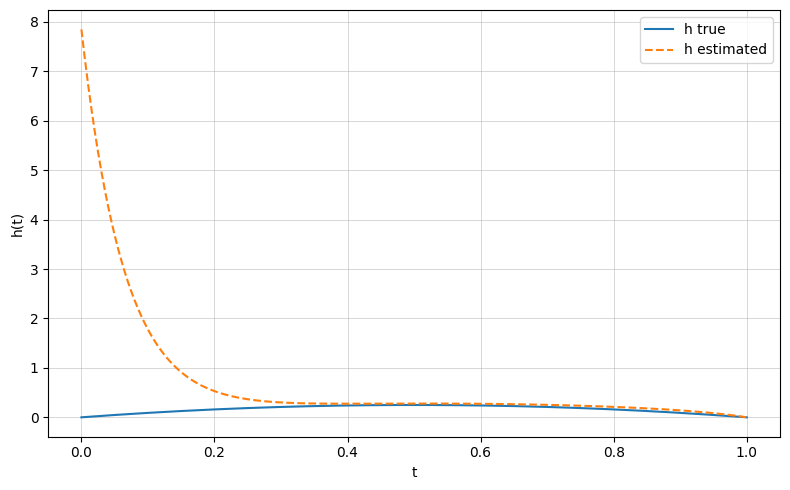

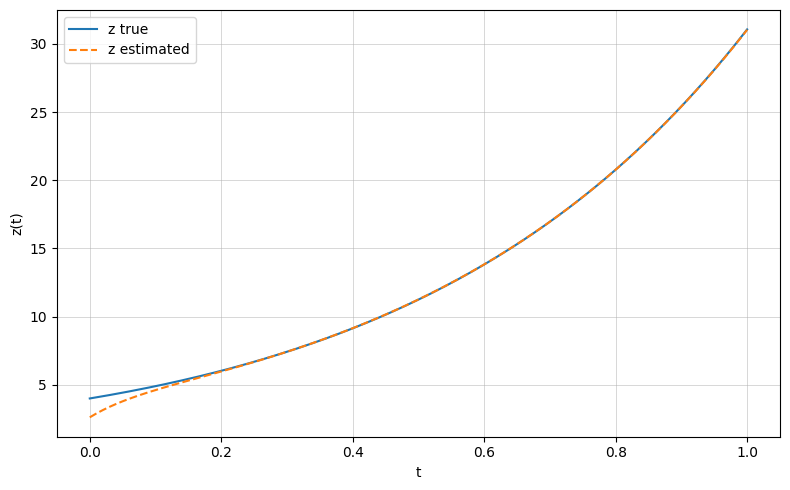

In [7]:
# Step 5: quick plots
make_plots(h_true, z_true, z_est, h_est, t, q1, q2, save=False, outdir = "figs")

In [8]:
# Step 5: metrics
z0_error, z0_energy, z_rmse, h_rmse, misfit, henergy = compute_metrics(C, z0, h_true, z_true, y_m, z0_est, z_est, h_est, t)
print("===== Résultats =====")
print(f"z0 true = {z0}, z0 estimated = {z0_est}, error = {z0_error}")
print(f"RMSE_z    = {z_rmse}")
print(f"RMSE_h    = {h_rmse}")
print(f"YMisfit   = {misfit}")
print(f"z0HEnergy = {z0_energy**2 + henergy}")
print(f"z0Energy  = {z0_energy}")
print(f"HEnergy   = {henergy}")


===== Résultats =====
z0 true = 4, z0 estimated = 2.6165732567303084, error = 1.3834267432696916
RMSE_z    = 0.255971798999532
RMSE_h    = 1.4667715935626415
YMisfit   = 1.4661046269214684
z0HEnergy = 8.954572243745071
z0Energy  = 2.6165732567303084
HEnergy   = 2.108116635908819


## Sensibility of $q_2$

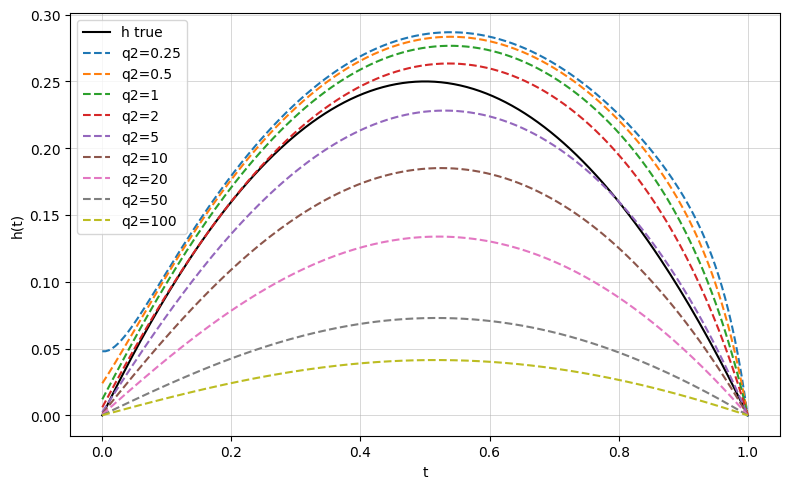

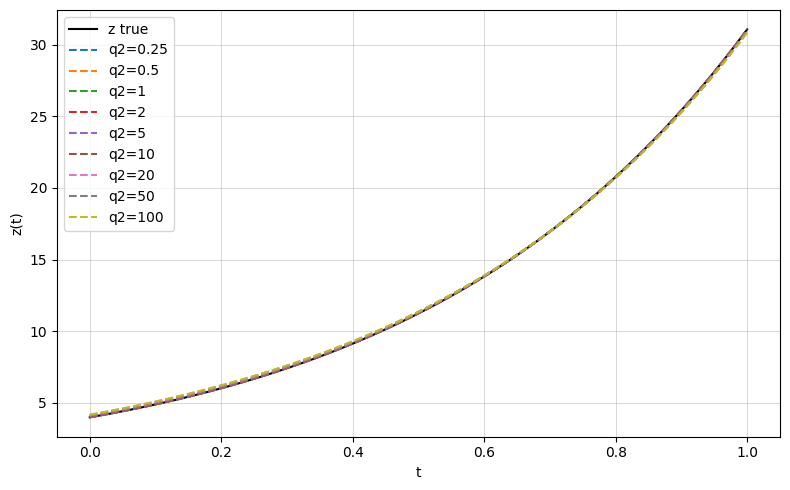

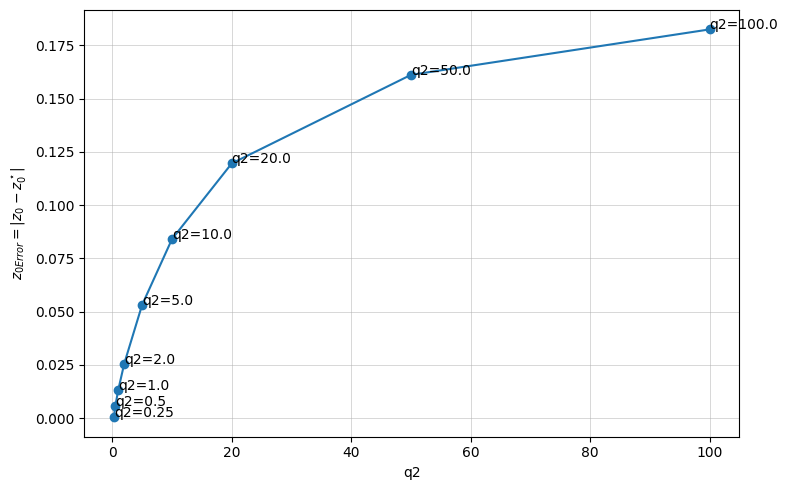

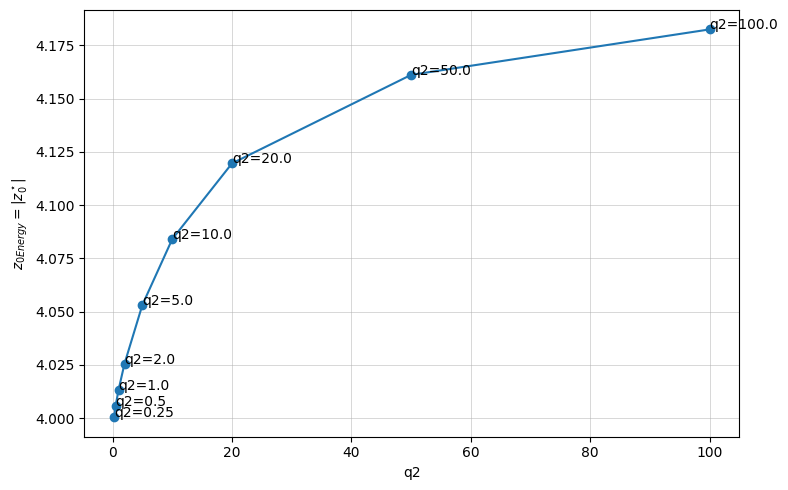

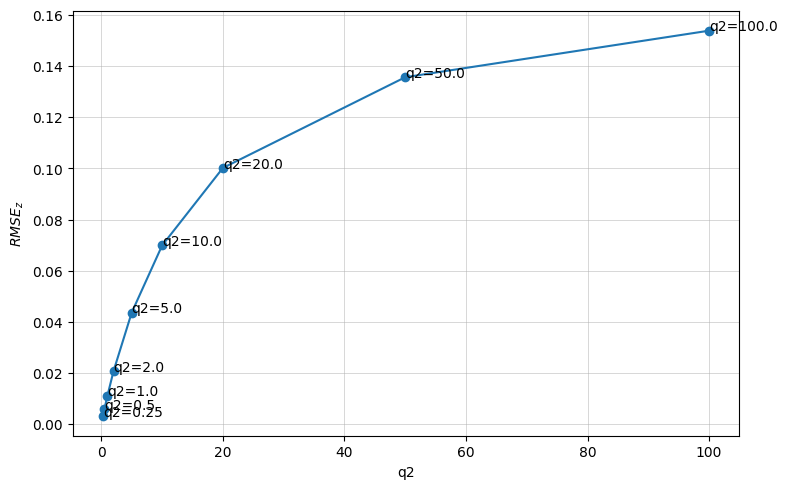

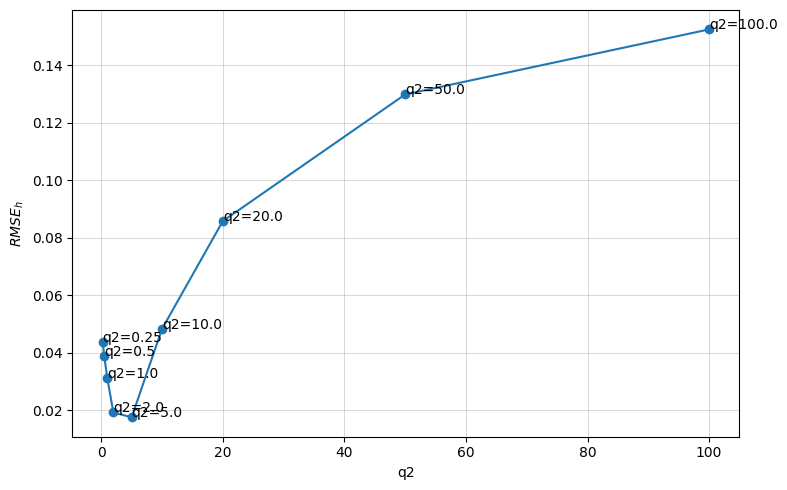

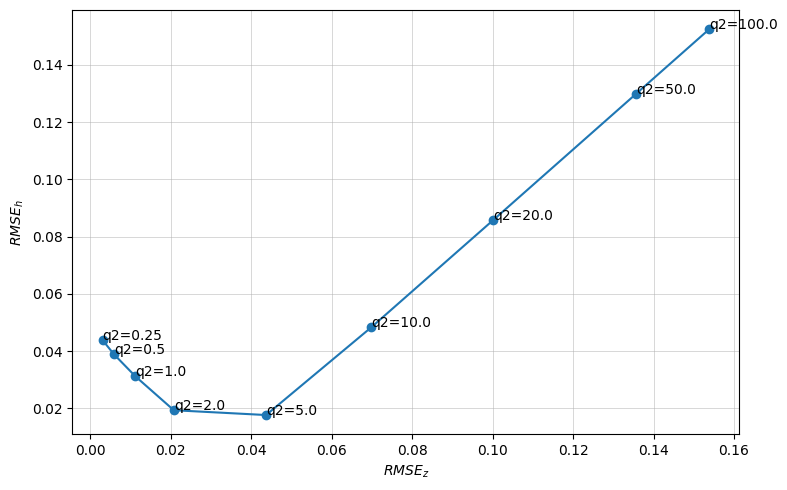

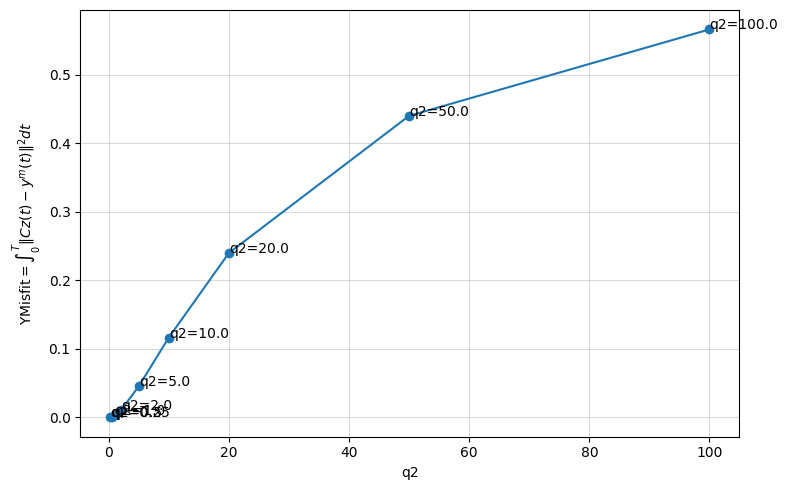

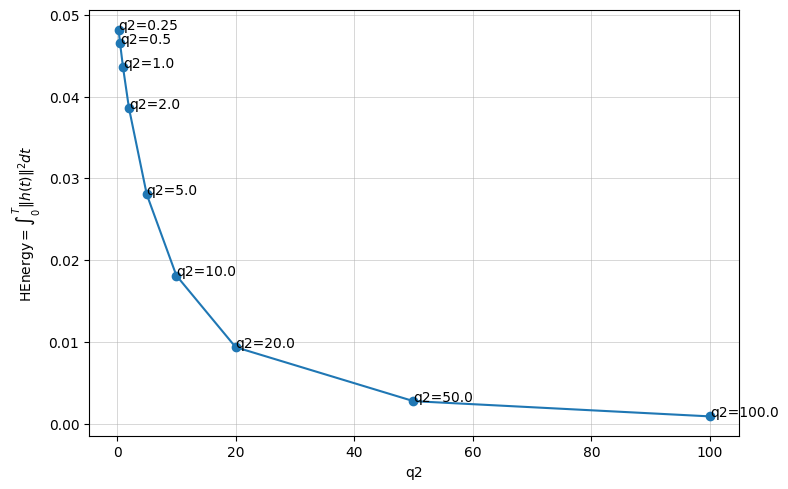

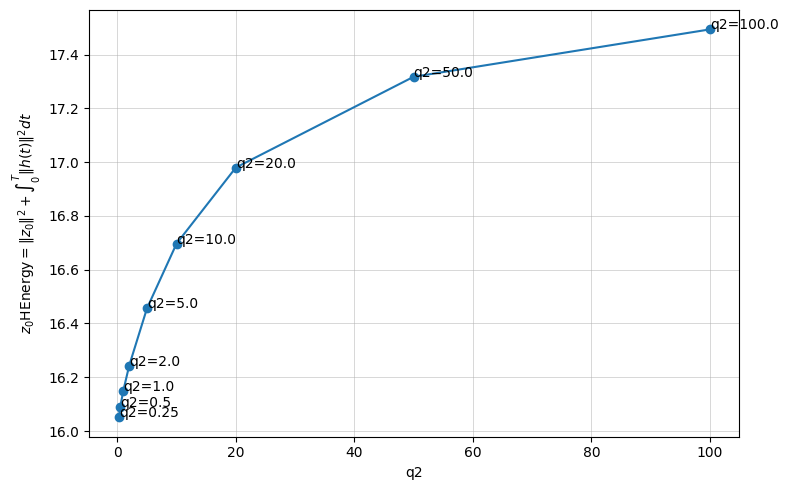

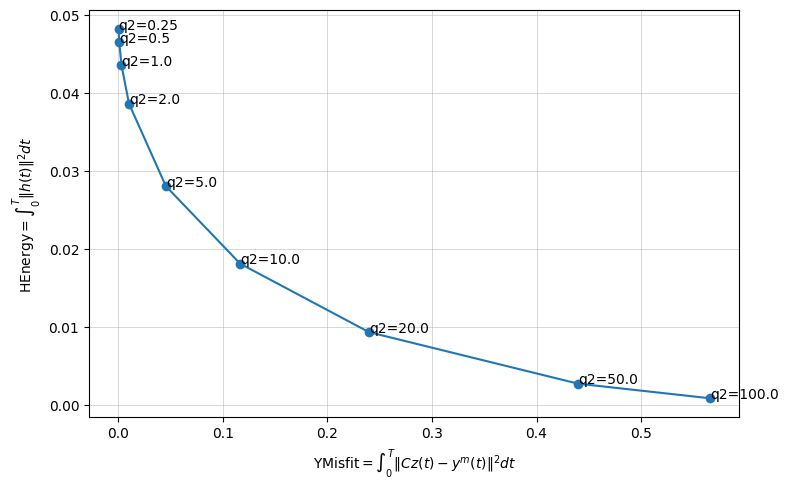

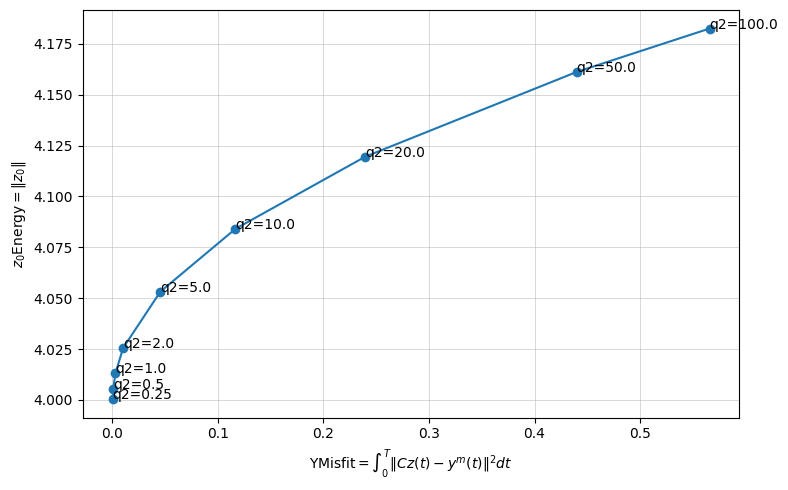

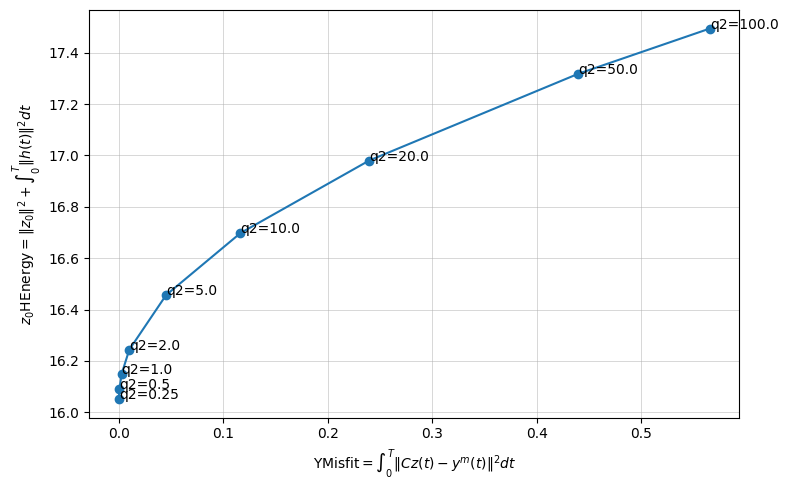

In [9]:
# Sensibility of q2: sweep q2, compute solutions & metrics
q1 = 0.001  #0.01
q2_list = [0.25, 0.5, 1, 2, 5, 10, 20, 50, 100]     # we start by 0.25 because q2<=0.1 flatten the curves
q2_uniq_vals = q2_list.copy()   # needed for 3D plots

curves_z, curves_h, metrics = q2_sensibility(A, G2, C, z0, h, T, N, q1, q2_list, show=True, save=False, outdir = "figs")

The plots indicate to choice q2 between 2 -- 5. <br>
The elbow-based compromise on RMSE_z/RMSE_h indicate q2 arround 3.5, while those on YMisfit/HEnergy indicate q2 arround 3.25. <br>
See the two results below.

In [10]:
print("Elbow-based compromise (L-curve on (RMSE_z, RMSE_h)):\nIn progress...")
q1 = 0.001
# q2_list = [0.25, 0.5, 1, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4, 4.25, 4.5, 4.75, 5, 10, 20, 50, 100] #refined
q2_list = [2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4, 4.25, 4.5, 4.75, 5]    # refined and zoomed
q2_uniq_vals += q2_list     # needed for 3D plots
curves_z, curves_h, metrics = q2_sensibility(A, G2, C, z0, h, T, N, q1, q2_list, show=False, save=False, outdir = "figs")
idx_elbow_rmse = find_Lcurve_elbow(metrics, x_col="z_rmse", y_col="h_rmse", use_log=True, sort_on='q2')
row_star_rmse = metrics.loc[idx_elbow_rmse]
row_star_rmse

Elbow-based compromise (L-curve on (RMSE_z, RMSE_h)):
In progress...


q2            3.500000
z0_error      0.040606
z0_energy     4.040606
z_rmse        0.033108
h_rmse        0.010816
misfit        0.026099
henergy       0.032677
energy       16.359176
Name: 6, dtype: float64

In [11]:
print("Elbow-based compromise (L-curve on (YMisfit, Energy)):\nIn progress...")
q1 = 0.001
# q2_list = [0.25, 0.5, 1, 2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4, 4.25, 4.5, 4.75, 5, 10, 20, 50, 100] #refined
q2_list = [2, 2.25, 2.5, 2.75, 3, 3.25, 3.5, 3.75, 4, 4.25, 4.5, 4.75, 5]    # refined and zoomed
q2_uniq_vals += q2_list     # needed for 3D plots
curves_z, curves_h, metrics = q2_sensibility(A, G2, C, z0, h, T, N, q1, q2_list, show=False, save=False, outdir = "figs")
idx_elbow_misfit = find_Lcurve_elbow(metrics, x_col="misfit", y_col="energy", use_log=True, sort_on='q2')
row_star_misfit = metrics.loc[idx_elbow_misfit]
row_star_misfit


Elbow-based compromise (L-curve on (YMisfit, Energy)):
In progress...


q2            3.250000
z0_error      0.038294
z0_energy     4.038294
z_rmse        0.031183
h_rmse        0.011029
misfit        0.023145
henergy       0.033562
energy       16.341384
Name: 5, dtype: float64

## Sensibility of $q_1$

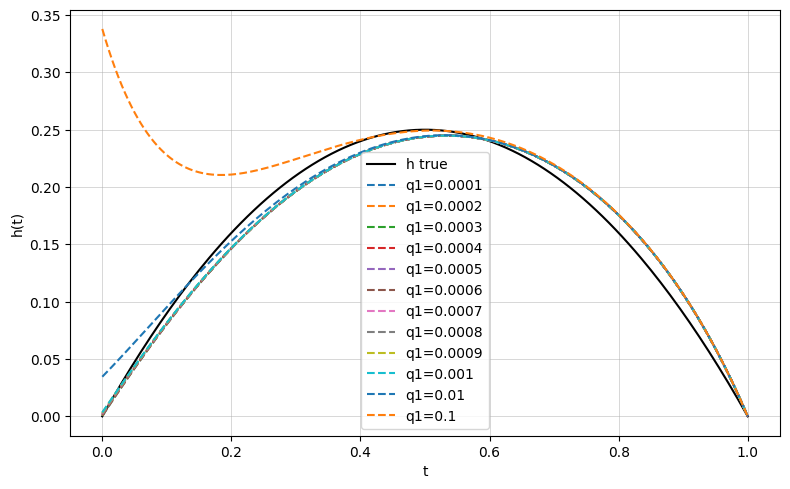

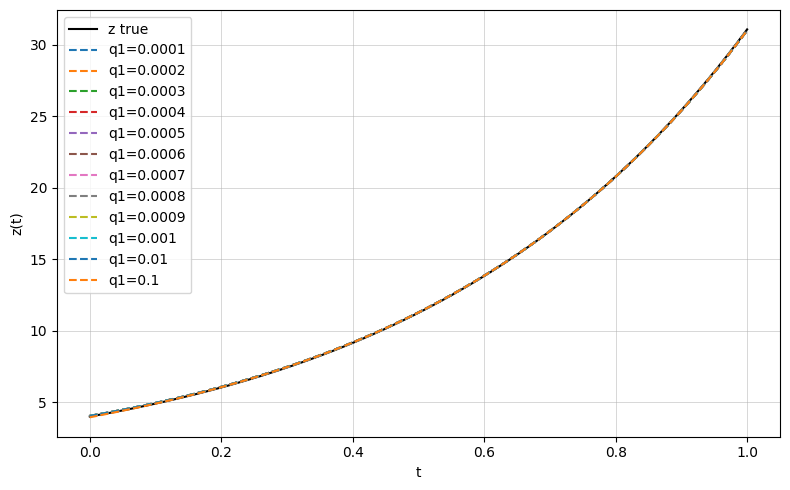

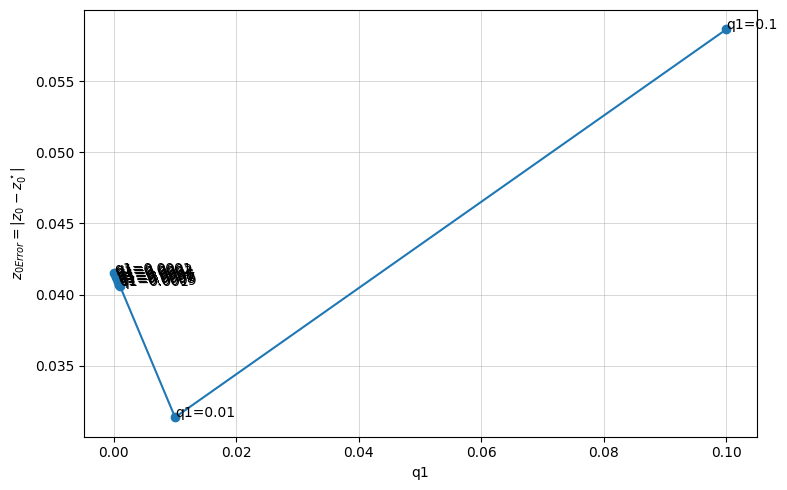

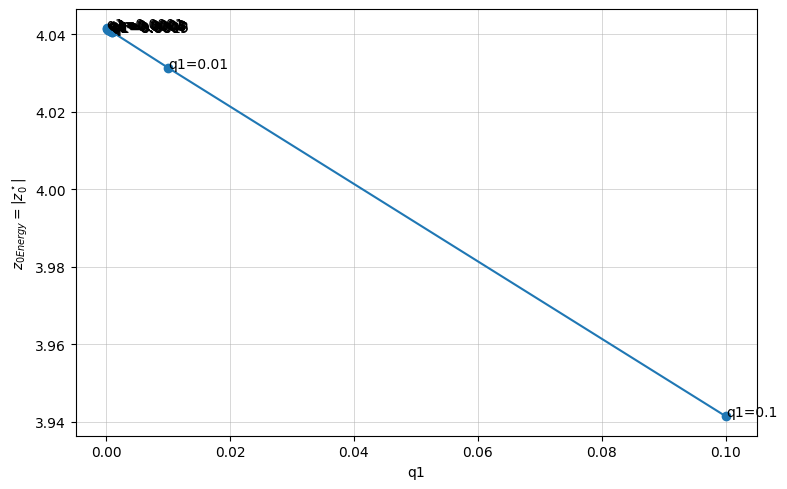

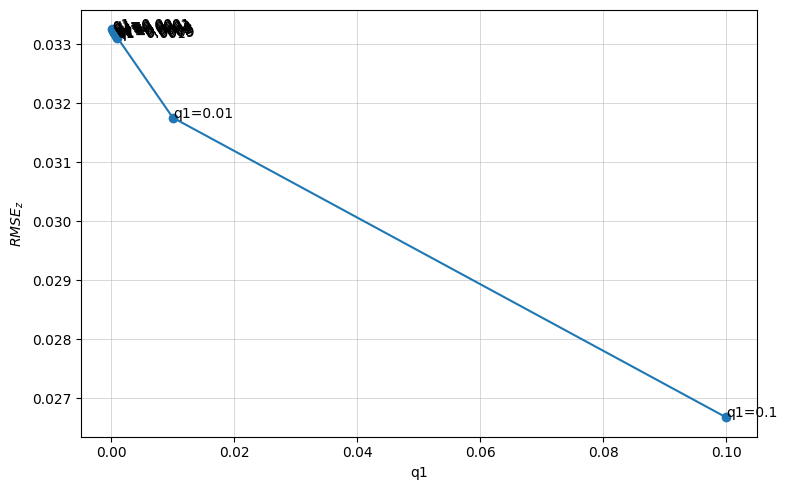

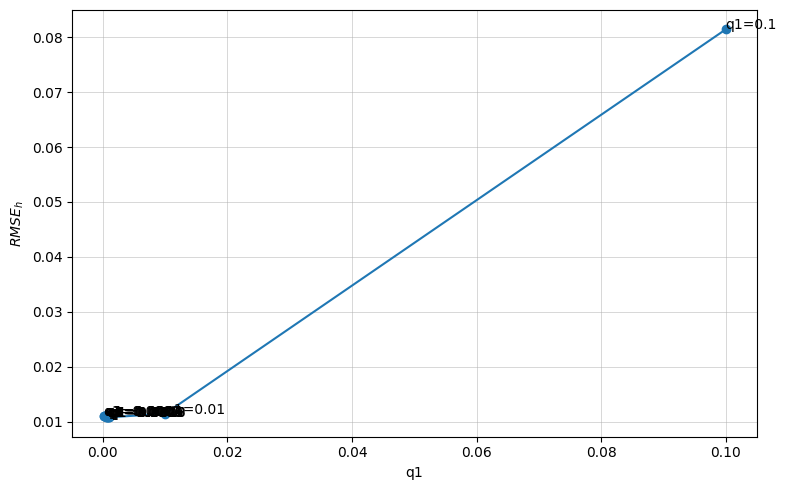

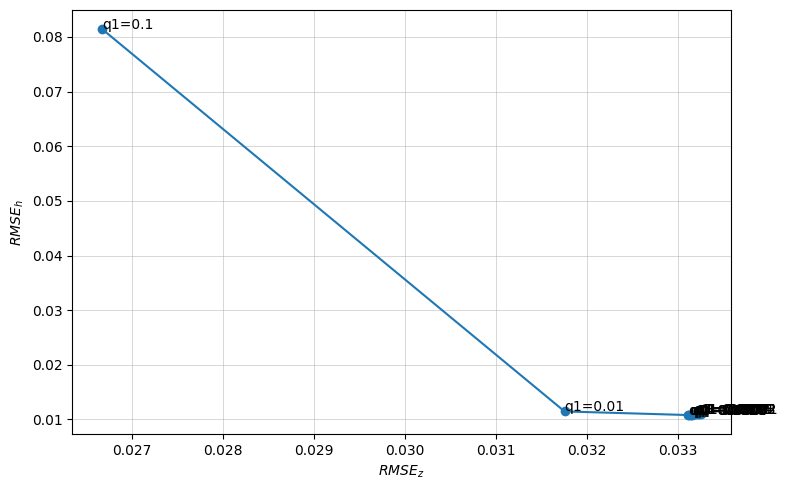

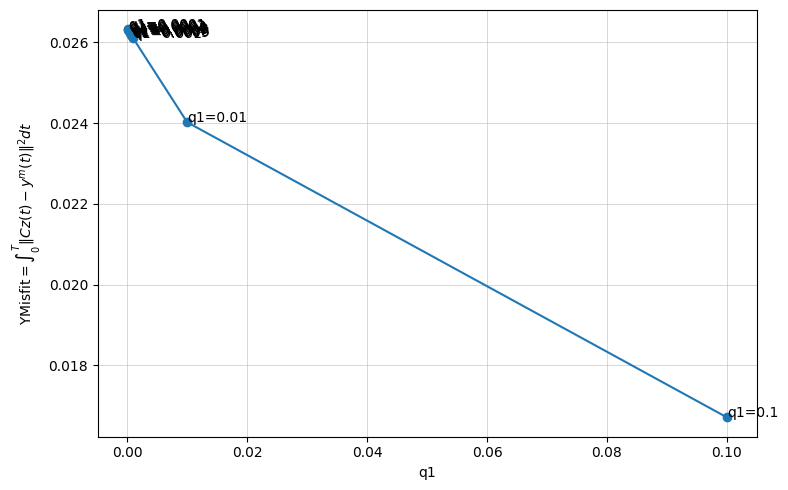

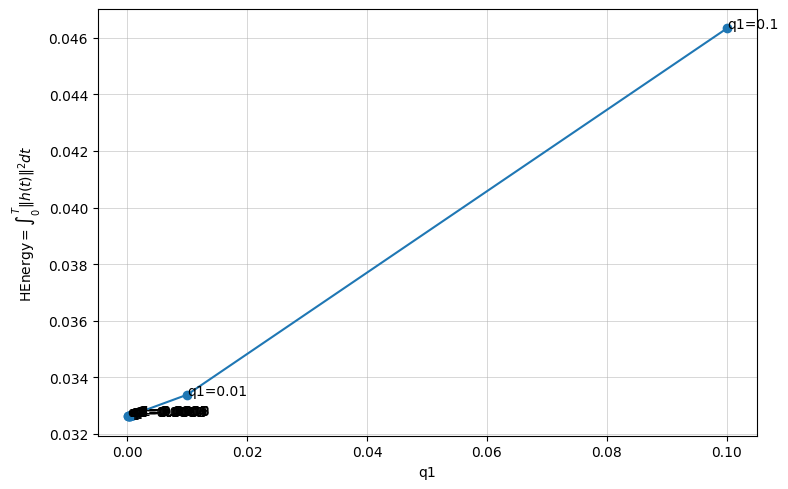

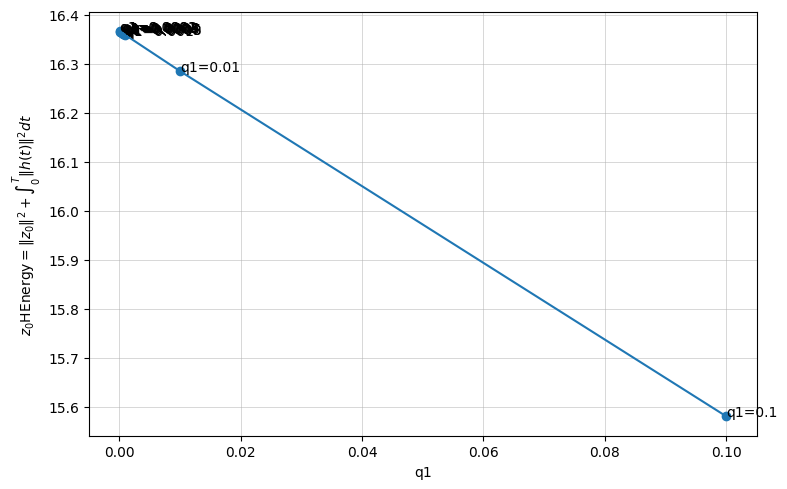

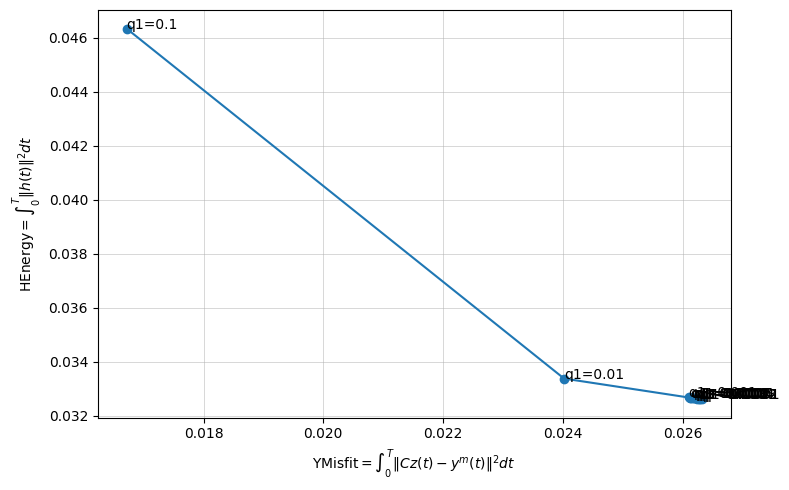

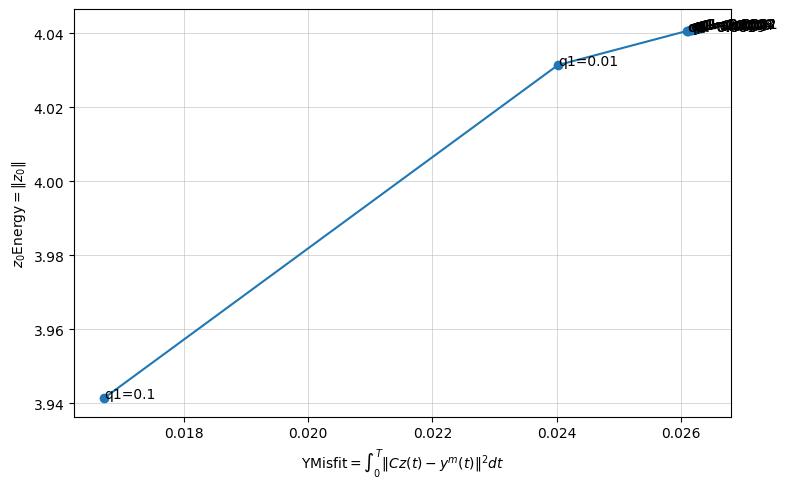

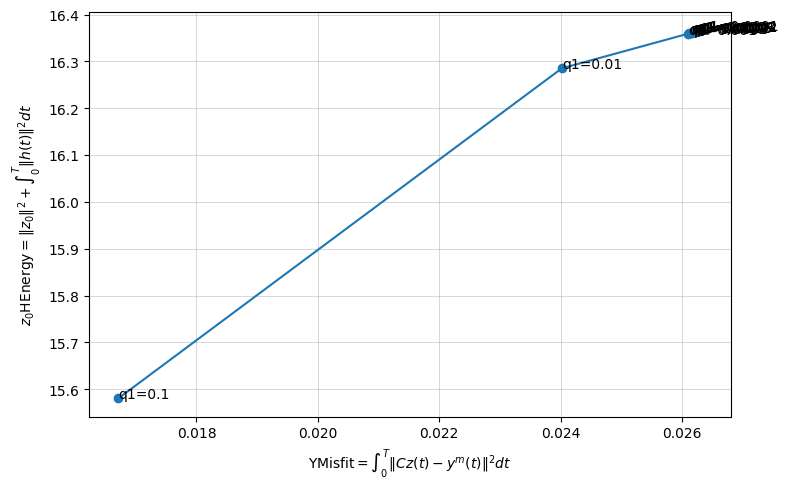

In [12]:
# Sensibility of q1: sweep q1, compute solutions & metrics
# q1_list = [0.001, 0.01, 0.1, 0.25, 0.5, 1, 2, 5, 10]
q1_list = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.01, 0.1]
q1_uniq_vals = q1_list.copy()     # needed for 3D plots
q2 = 3.5  # choice from L-curve on (RMSE_z, RMSE_h)

curves_z, curves_h, metrics = q1_sensibility(A, G2, C, z0, h, T, N, q1_list, q2, show=True, save=False, outdir = "figs")

The plots indicate to choice q1 arround 0.001. <br>
See the result below.

In [13]:
print("Elbow-based compromise (L-curve on (RMSE_z, RMSE_h)):\nIn progress...")
# q1_list = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.01, 0.1]    #refined
q1_list = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001]      #refined and zoomed
q1_uniq_vals += q1_list     # needed for 3D plots
q2 = 3.5  # choice from L-curve on (RMSE_z, RMSE_h)

curves_z, curves_h, metrics = q1_sensibility(A, G2, C, z0, h, T, N, q1_list, q2, show=False, save=False, outdir = "figs")
idx_elbow_rmse = find_Lcurve_elbow(metrics, x_col="z_rmse", y_col="h_rmse", use_log=True, sort_on='q1')
row_star_rmse = metrics.loc[idx_elbow_rmse]
row_star_rmse

Elbow-based compromise (L-curve on (RMSE_z, RMSE_h)):
In progress...


q1            0.000600
z0_error      0.041017
z0_energy     4.041017
z_rmse        0.033171
h_rmse        0.010916
misfit        0.026197
henergy       0.032648
energy       16.362470
Name: 5, dtype: float64

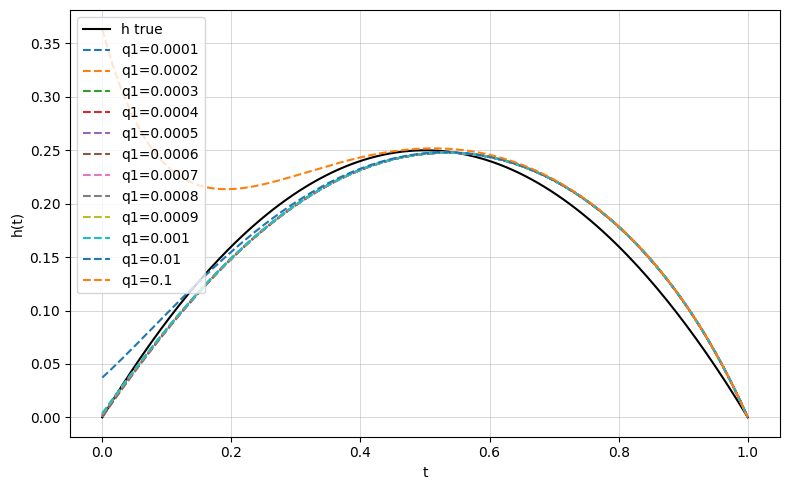

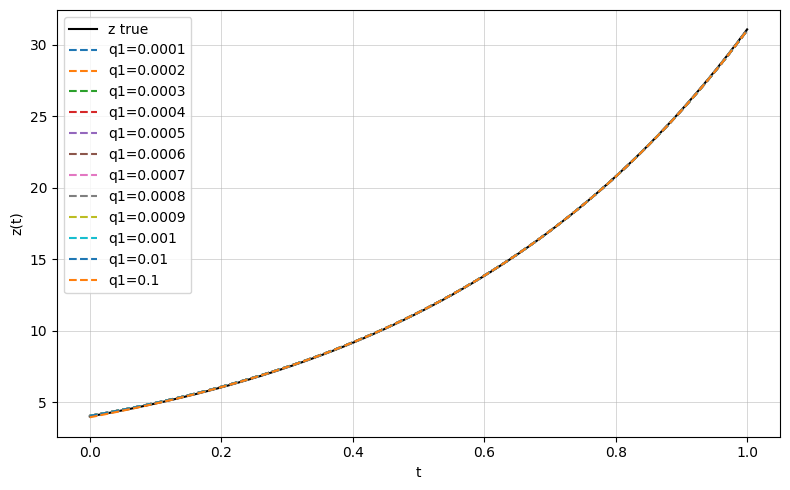

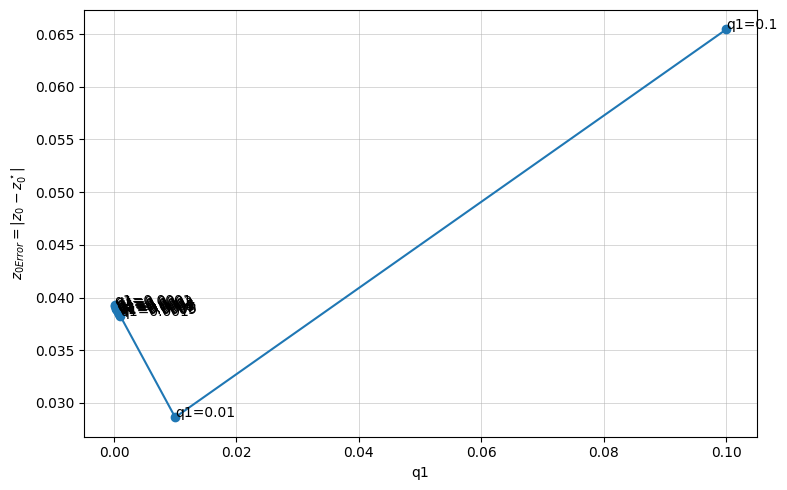

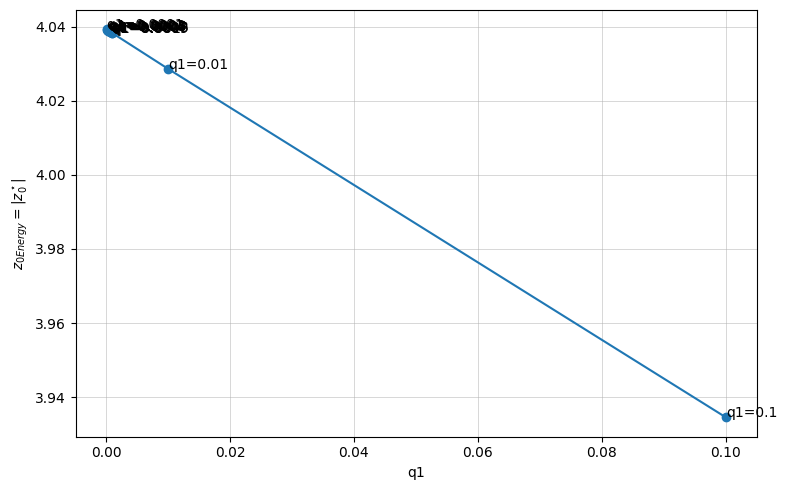

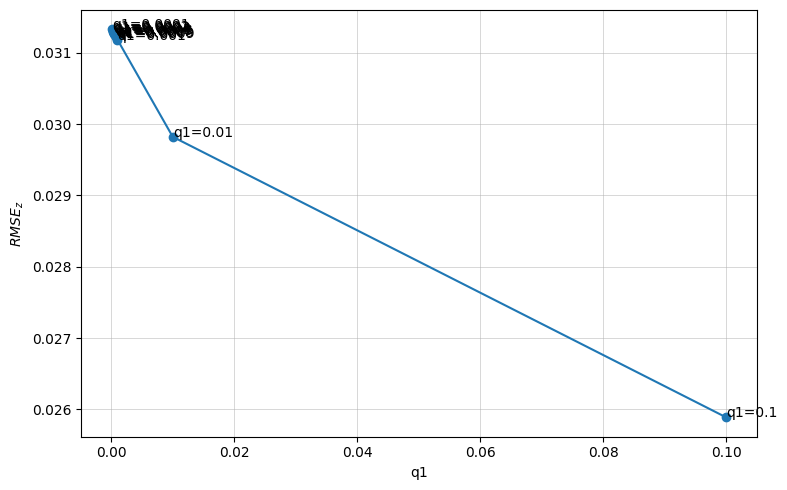

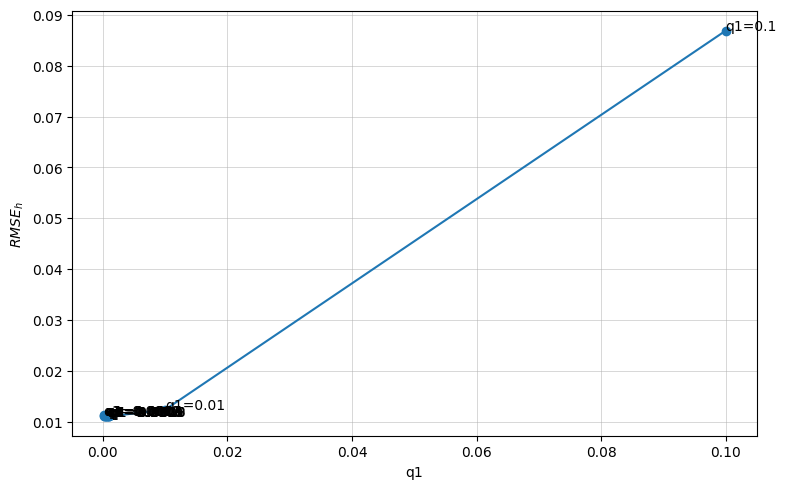

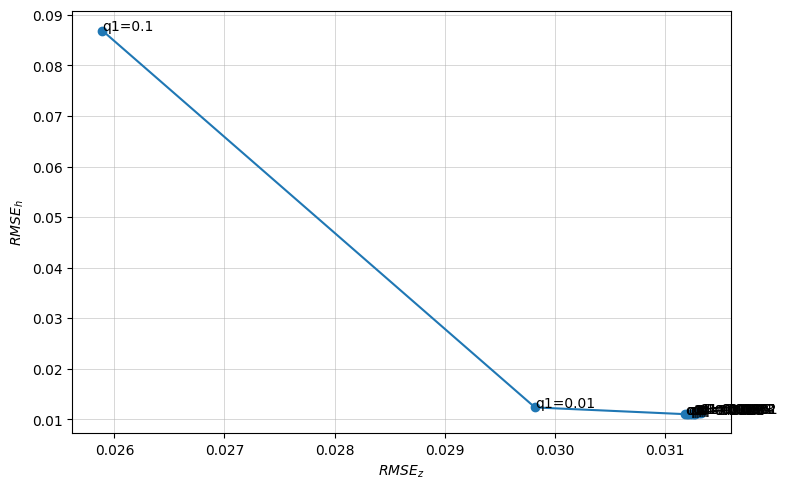

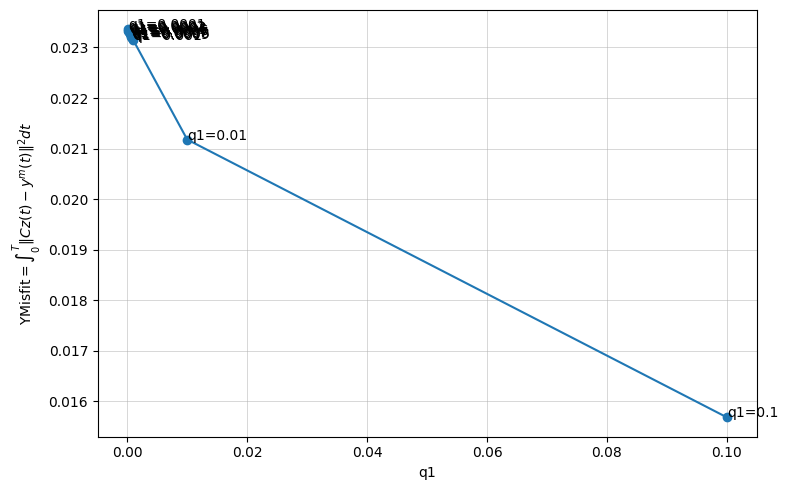

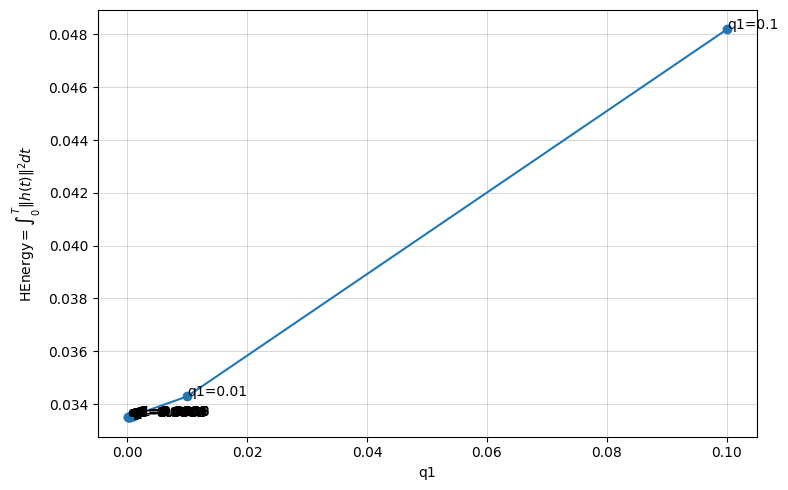

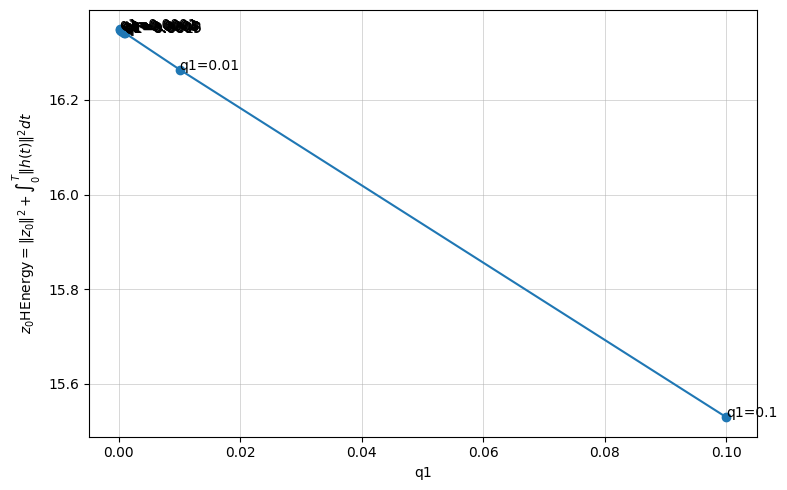

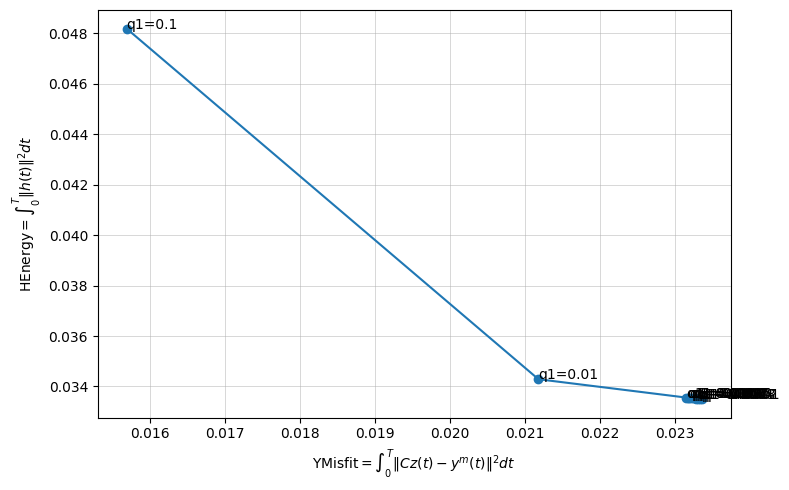

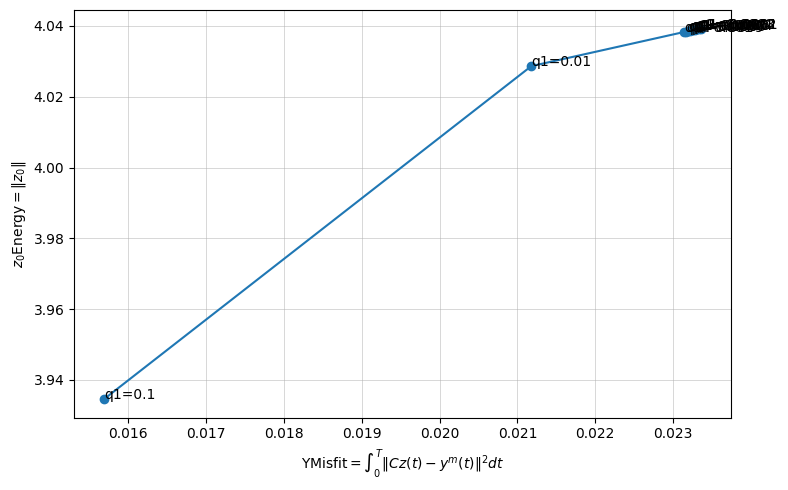

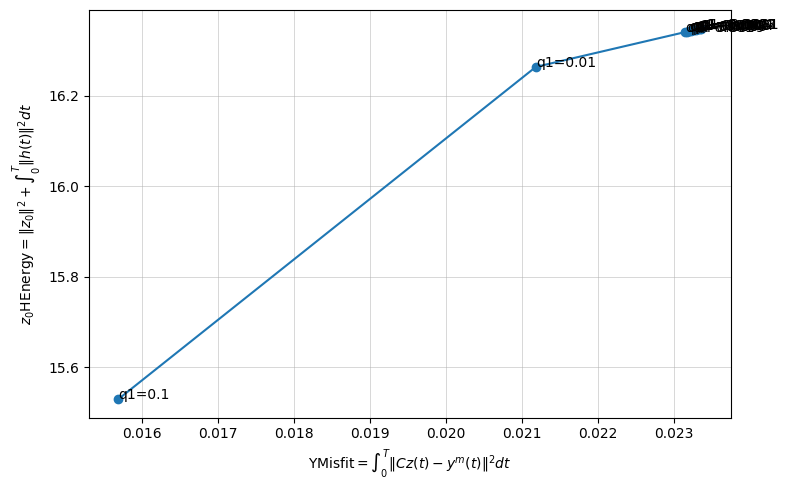

In [14]:
# 2nd sensibility of q1: sweep q1, compute solutions & metrics
# q1_list = [0.001, 0.01, 0.1, 0.25, 0.5, 1, 2, 5, 10]
q1_list = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.01, 0.1]
q1_uniq_vals += q1_list     # needed for 3D plots
q2 = 3.25  # choice from L-curve on (YMisfit, z0HEnergy)

curves_z, curves_h, metrics = q1_sensibility(A, G2, C, z0, h, T, N, q1_list, q2, show=True, save=False, outdir = "figs")

Also here, the plots indicate to choice q1 arround 0.001. <br>
See the two results below.

In [15]:
print("Elbow-based compromise (L-curve on (YMisfit, Energy)):\nIn progress...")
# q1_list = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.01, 0.1]    #refined
q1_list = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001]      #refined and zoomed
q1_uniq_vals += q1_list     # needed for 3D plots
q2 = 3.25  # choice from L-curve on (YMisfit, z0HEnergy)

curves_z, curves_h, metrics = q1_sensibility(A, G2, C, z0, h, T, N, q1_list, q2, show=False, save=False, outdir = "figs")
idx_elbow_misfit = find_Lcurve_elbow(metrics, x_col="misfit", y_col="energy", use_log=True, sort_on='q1')
row_star_misfit = metrics.loc[idx_elbow_misfit]
row_star_misfit

Elbow-based compromise (L-curve on (YMisfit, Energy)):
In progress...


q1            0.000600
z0_error      0.038725
z0_energy     4.038725
z_rmse        0.031247
h_rmse        0.011109
misfit        0.023239
henergy       0.033533
energy       16.344829
Name: 5, dtype: float64

## Sensibility of $q_1$ and $q_2$

In [16]:
q1_vals = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 
           0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 
           0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 
           0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
           1]
q2_vals = [0.25, 0.5, 1.0, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0]

In [17]:
q1_vals = list(np.unique(q1_uniq_vals))
q2_vals = list(np.unique(q2_uniq_vals))
print(q1_vals)
print(q2_vals)

[0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.01, 0.1]
[0.25, 0.5, 1.0, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0, 10.0, 20.0, 50.0, 100.0]


Elbow-based compromise (L-curve on (RMSE_z, RMSE_h)
  q1* = 0.001, q2* = 3.5
  z0Error*   = 0.04060632876768189
  RMSE_z*    = 0.03310815573827195
  RMSE_h*    = 0.010816453903076895
  YMisfit*   = 0.026098809107473274
  z0HEnergy* = 16.359176362501078
  z0Energy*  = 4.040606328767682
  HEnergy*   = 0.0326768584236353
  J*         = 0.15679431309427427
---------------------------------------------------------------------- 
Plot process: ...


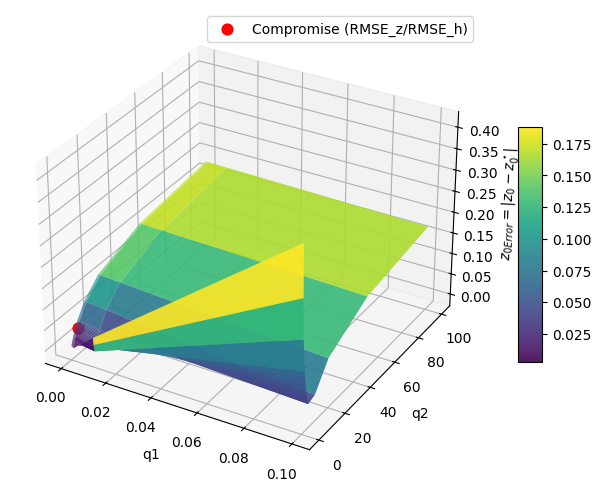

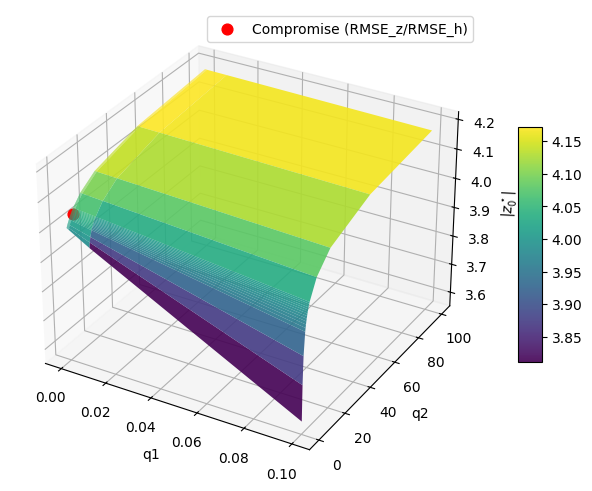

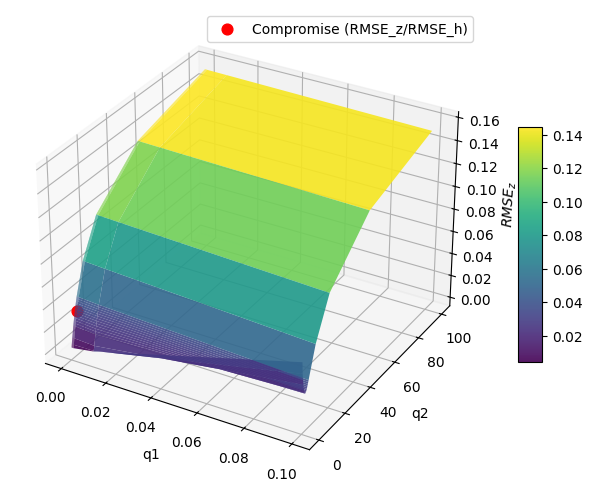

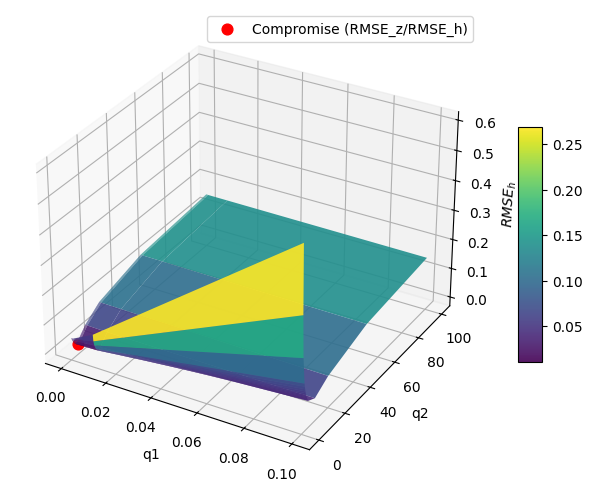

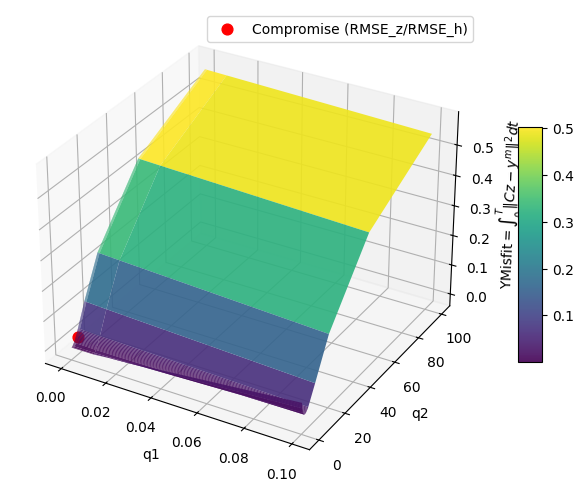

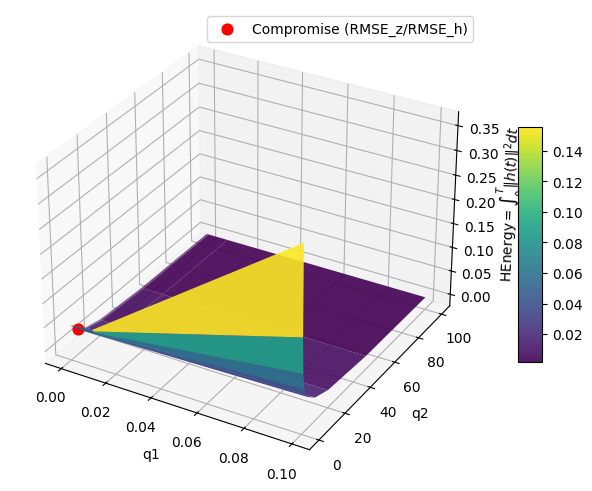

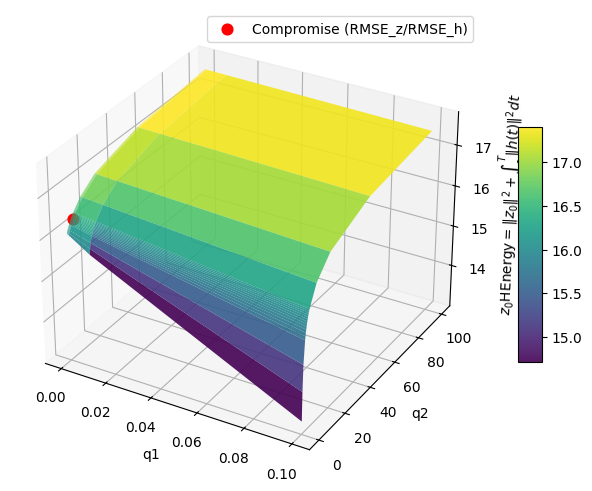

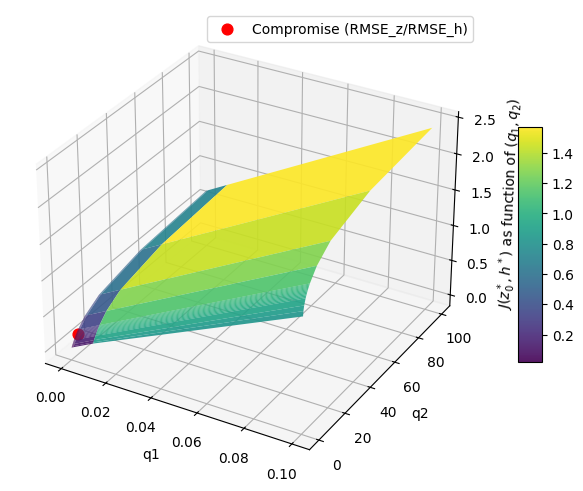

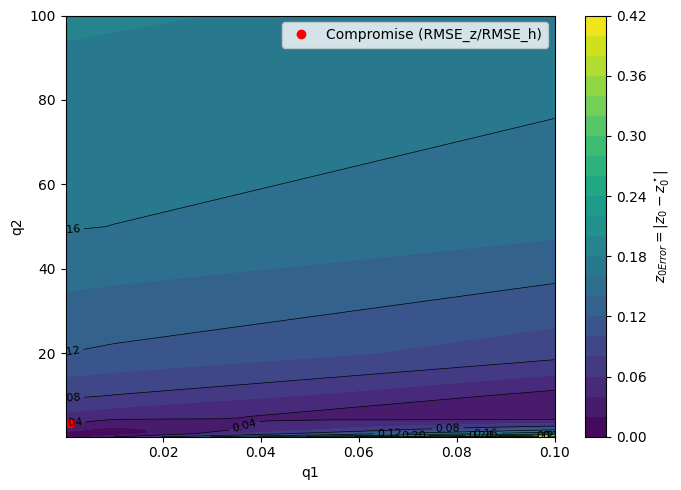

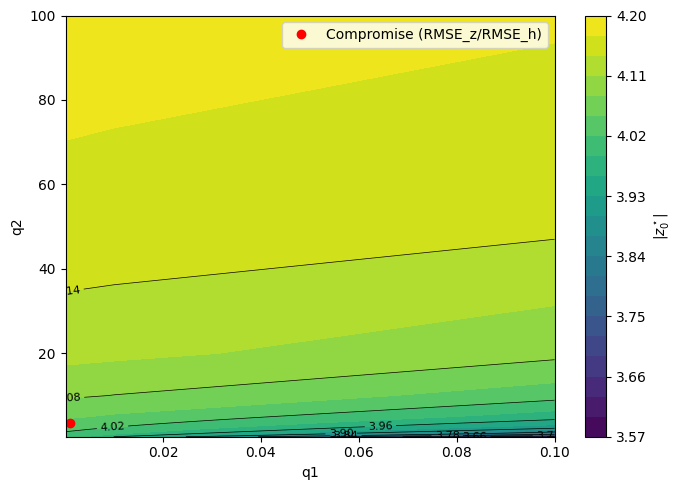

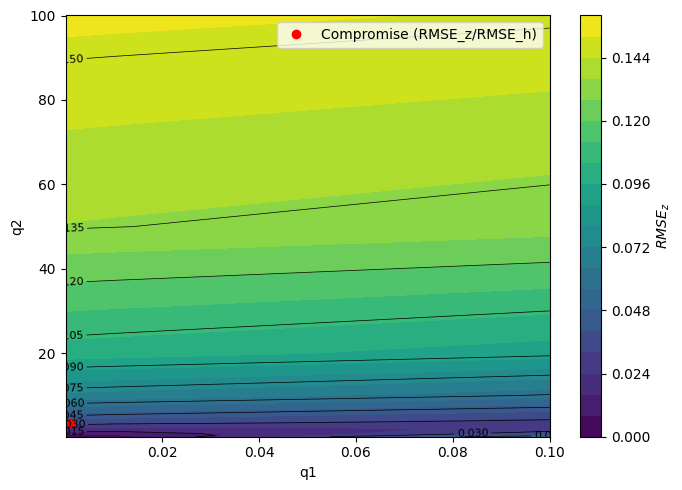

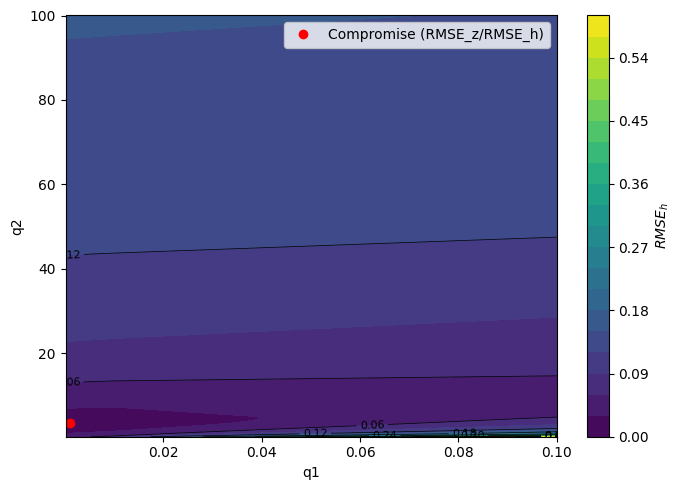

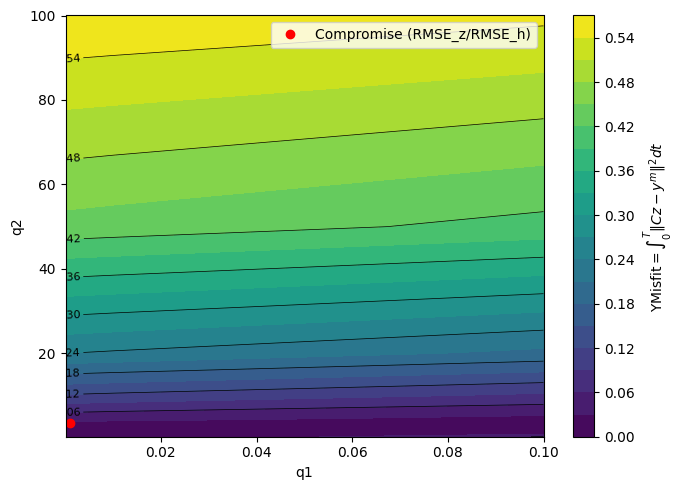

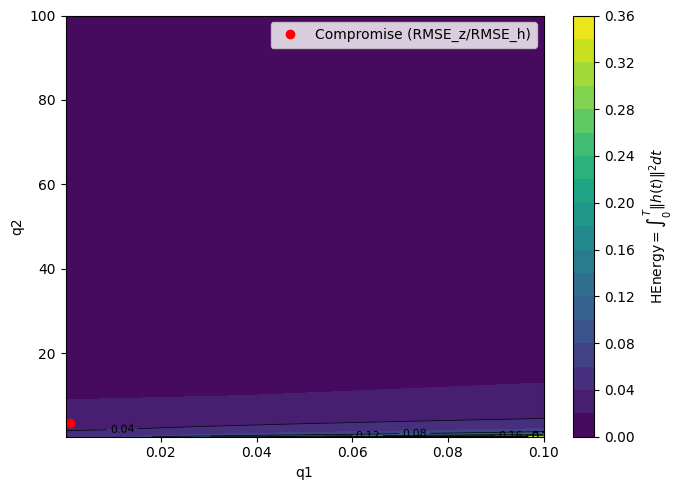

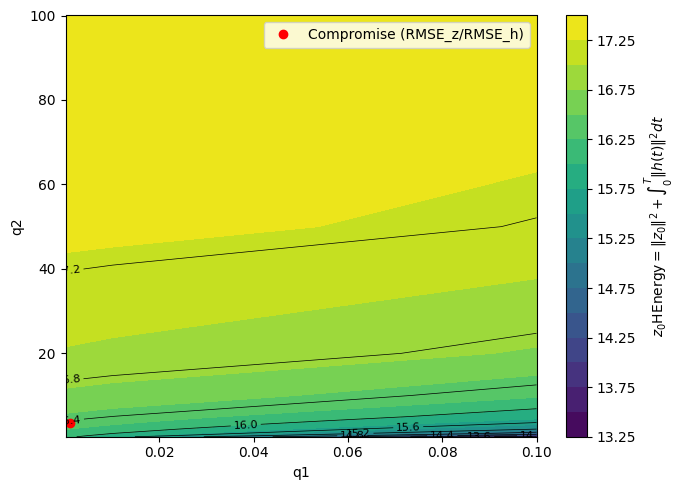

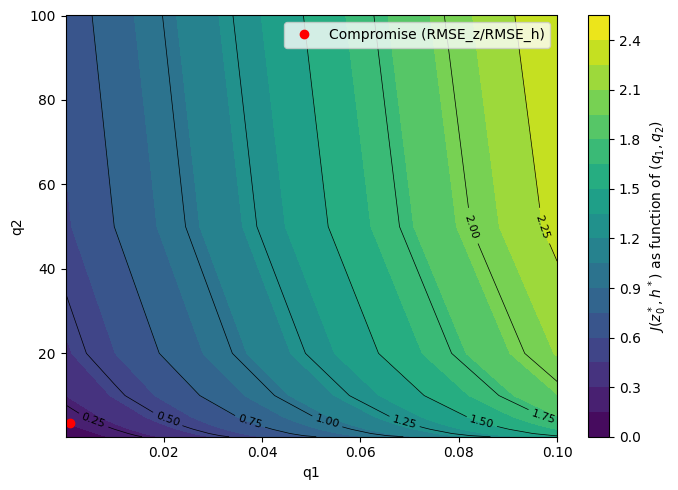

In [18]:
# Sensibility of q1 and q2: sweep q1 and q2, compute solutions & metrics, and search optimum q1 and q2 as L-curve compromise on RMSE_z/RMSE_h
curves_z, curves_h, metrics, q1_opt, q2_opt = q12_sensibility_with_optimum(A, G2, C, z0, h, T=1, N=200, 
                                                                           q1_list=q1_vals, q2_list=q2_vals, elbow_on='rmse', save=False, outdir="figs")

===== Results with q1*=0.001 and q2*=3.5 =====
z0 true = 4, z0 estimated = 4.040606328767682, error = 0.04060632876768189
RMSE_z    = 0.03310815573827195
RMSE_h    = 0.010816453903076895
YMisfit   = 0.026098809107473274
z0HEnergy = 16.359176362501078
z0Energy  = 4.040606328767682
HEnergy   = 0.0326768584236353


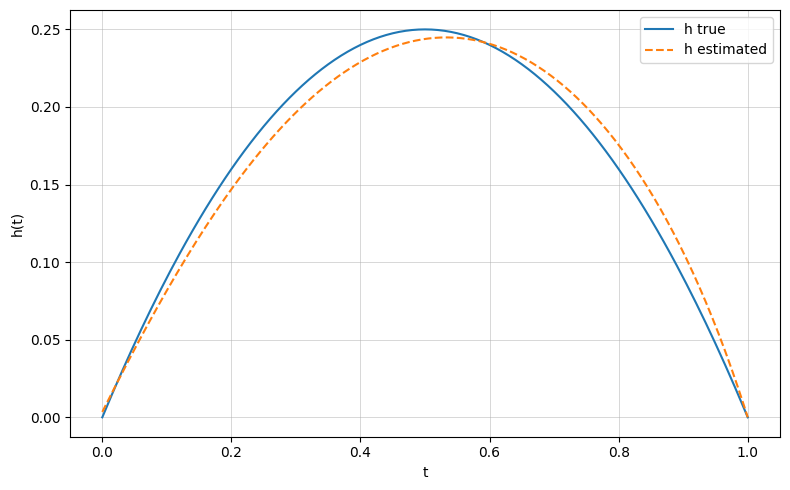

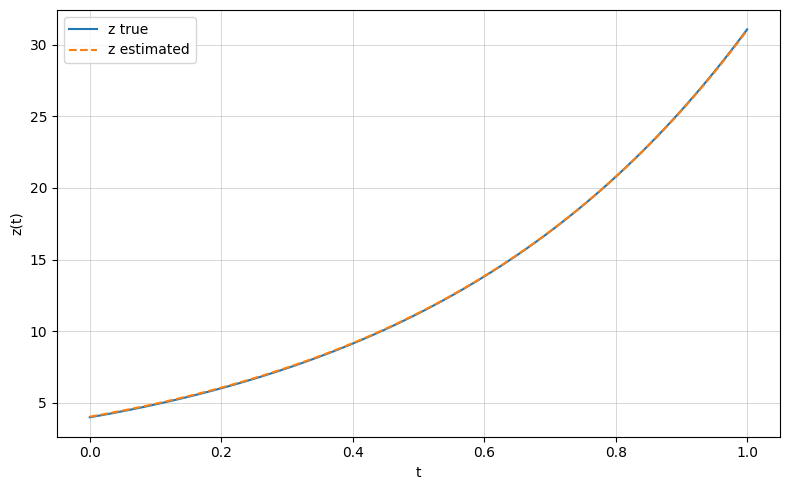

In [19]:
# Simulation for q1_opt and q2_opt (step 1 to 4)
h_true, z_true, y_m, z0_est, z_est, h_est = simulate_n1(A, G2, C, z0, h, T, N, q1_opt, q2_opt)

# Step 5: metrics
z0_error, z0_energy, z_rmse, h_rmse, misfit, henergy = compute_metrics(C, z0, h_true, z_true, y_m, z0_est, z_est, h_est, t)
print(f"===== Results with q1*={q1_opt} and q2*={q2_opt} =====")
print(f"z0 true = {z0}, z0 estimated = {z0_est}, error = {z0_error}")
print(f"RMSE_z    = {z_rmse}")
print(f"RMSE_h    = {h_rmse}")
print(f"YMisfit   = {misfit}")
print(f"z0HEnergy = {z0_energy**2 + henergy}")
print(f"z0Energy  = {z0_energy}")
print(f"HEnergy   = {henergy}")

# Step 5: quick plots
make_plots(h_true, z_true, z_est, h_est, t, q1_opt, q2_opt, save=False, outdir = "figs")

Elbow-based compromise (L-curve on (YMisfit, z0HEnergy)) :
  q1* = 0.1, q2* = 0.25
  z0Error*   = 0.40621755839187923
  RMSE_z*    = 0.0545062860815573
  RMSE_h*    = 0.5855244862817968
  YMisfit*   = 0.06177403532858978
  z0HEnergy* = 13.267469278938536
  z0Energy*  = 3.5937824416081208
  HEnergy*   = 0.3521970413277122
  J*         = 1.4413505194216005
---------------------------------------------------------------------- 
Plot process: ...


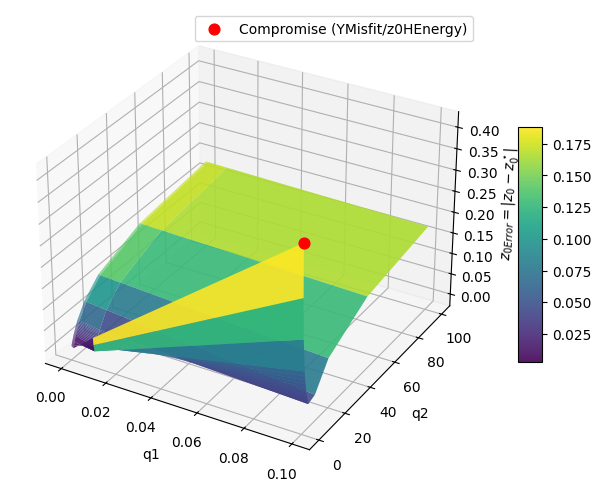

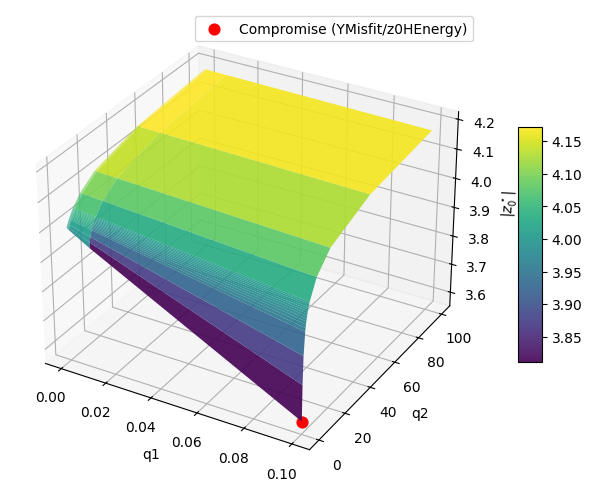

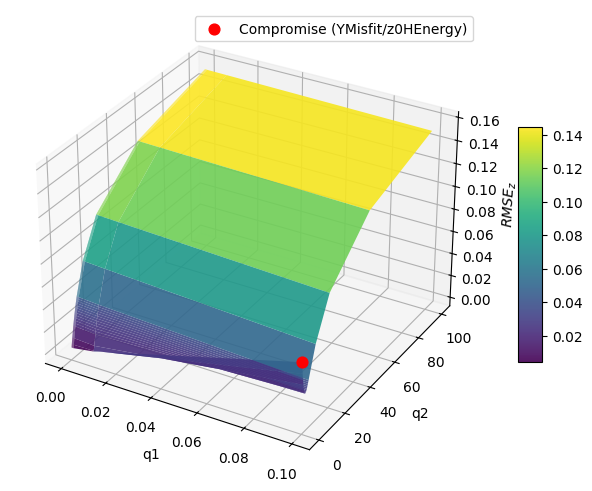

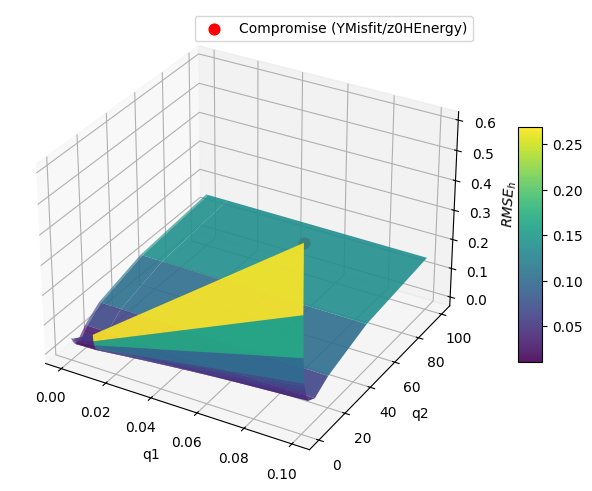

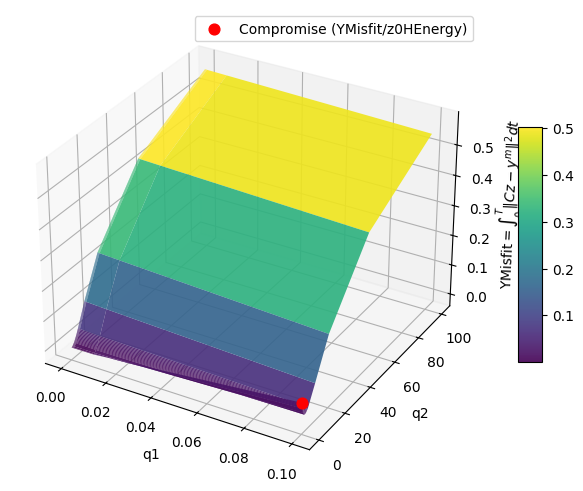

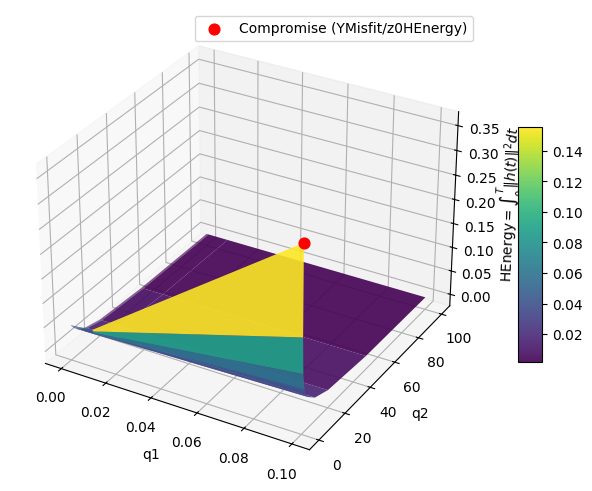

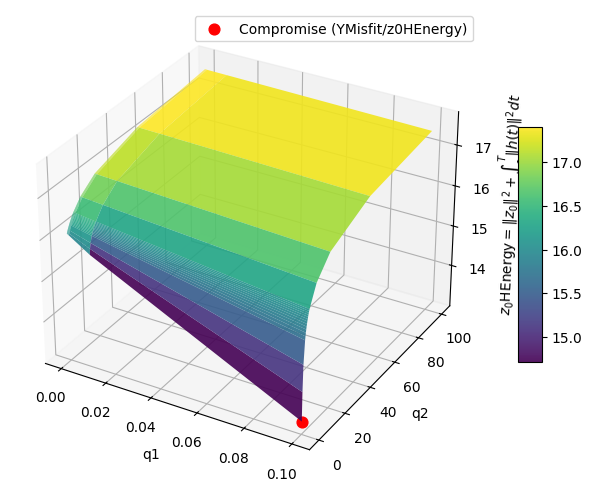

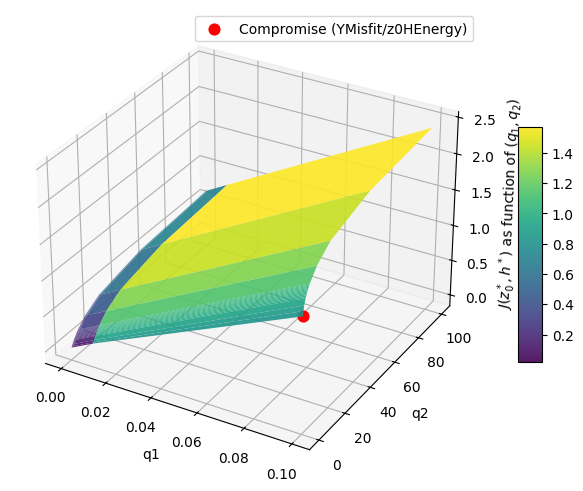

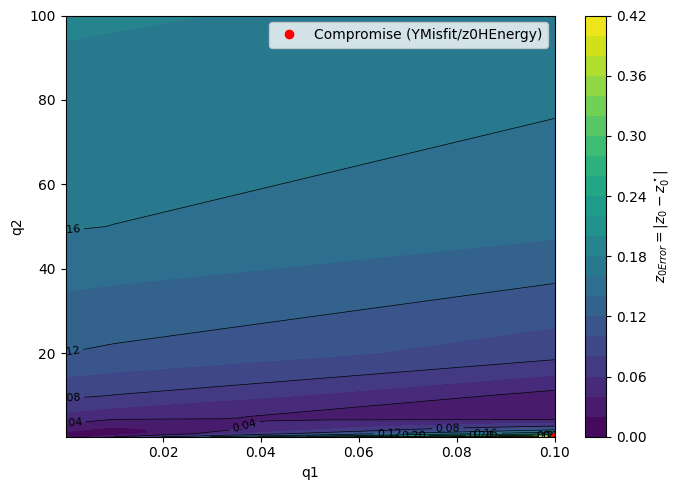

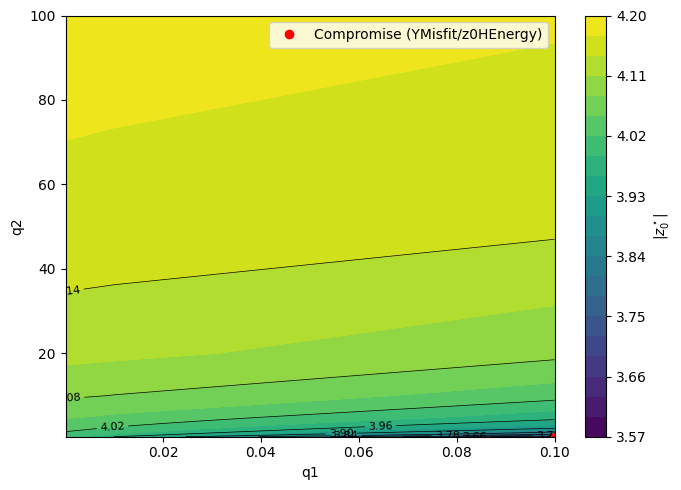

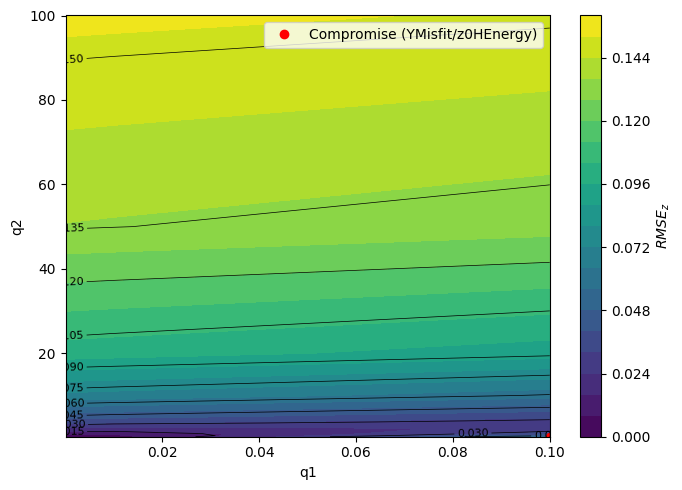

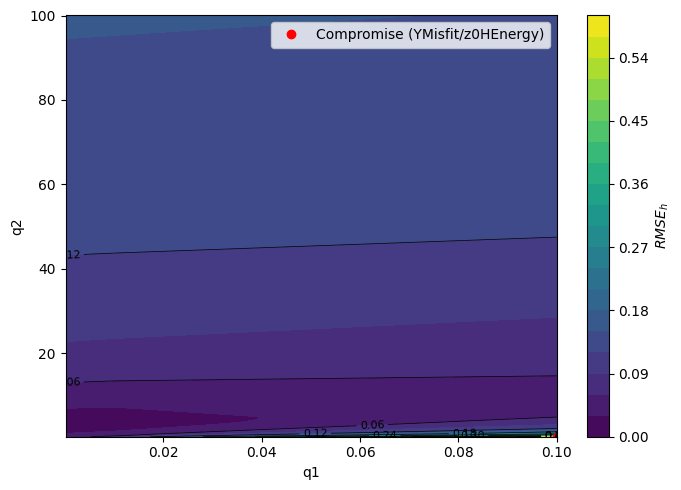

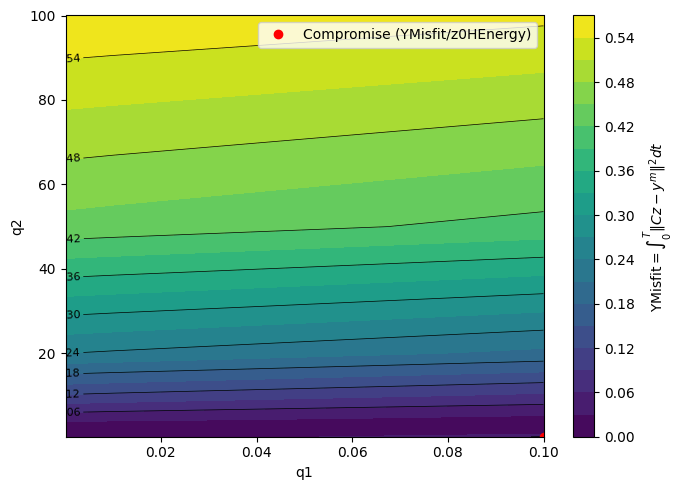

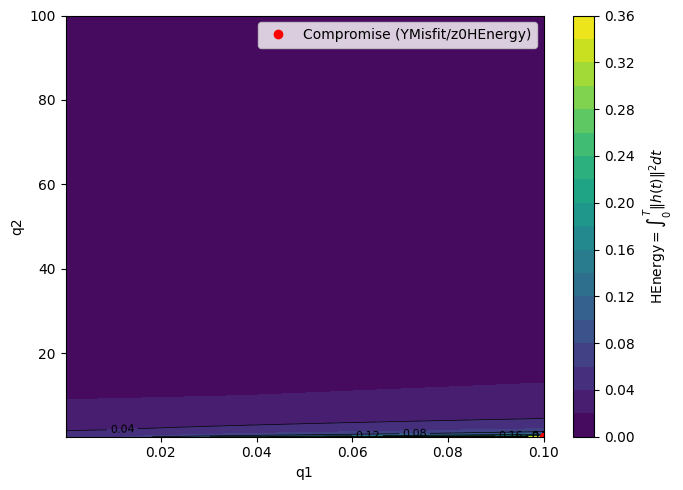

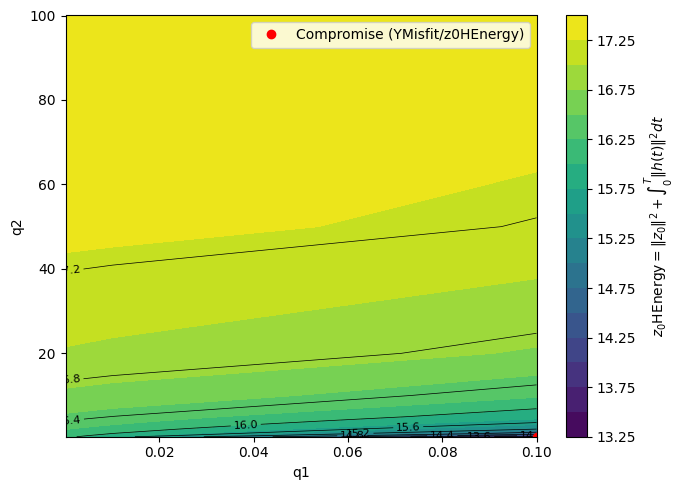

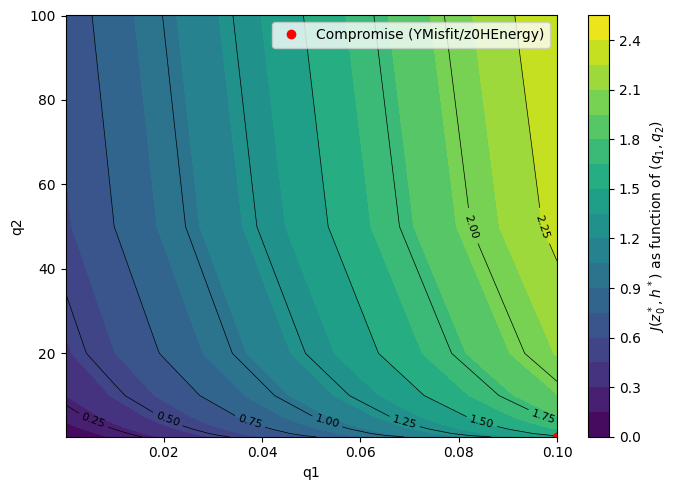

In [20]:
# Sensibility of q1 and q2: sweep q1 and q2, compute solutions & metrics, and search optimum q1 and q2 as L-curve compromise on YMisfit/HEnergy
curves_z, curves_h, metrics, q1_opt, q2_opt = q12_sensibility_with_optimum(A, G2, C, z0, h, T=1, N=200, 
                                                                           q1_list=q1_vals, q2_list=q2_vals, elbow_on='misfit', save=False, outdir="figs")

===== Results with q1*=0.1 and q2*=0.25 =====
z0 true = 4, z0 estimated = 3.5937824416081208, error = 0.40621755839187923
RMSE_z    = 0.0545062860815573
RMSE_h    = 0.5855244862817968
YMisfit   = 0.06177403532858978
z0HEnergy = 13.267469278938536
z0Energy  = 3.5937824416081208
HEnergy   = 0.3521970413277122


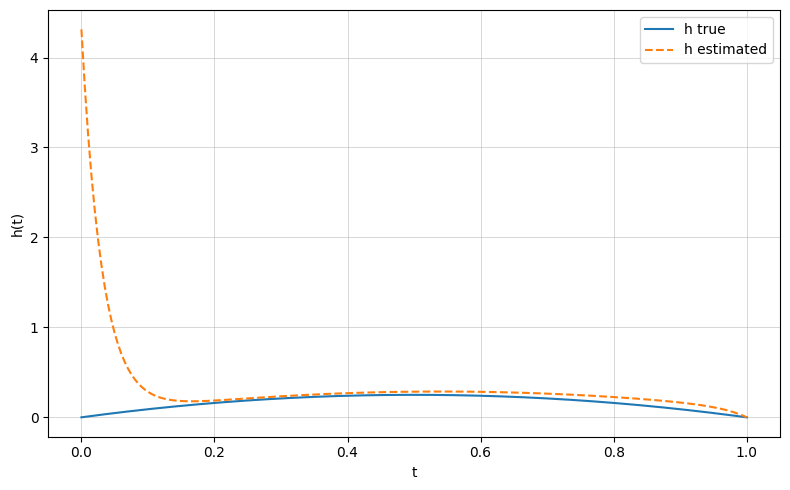

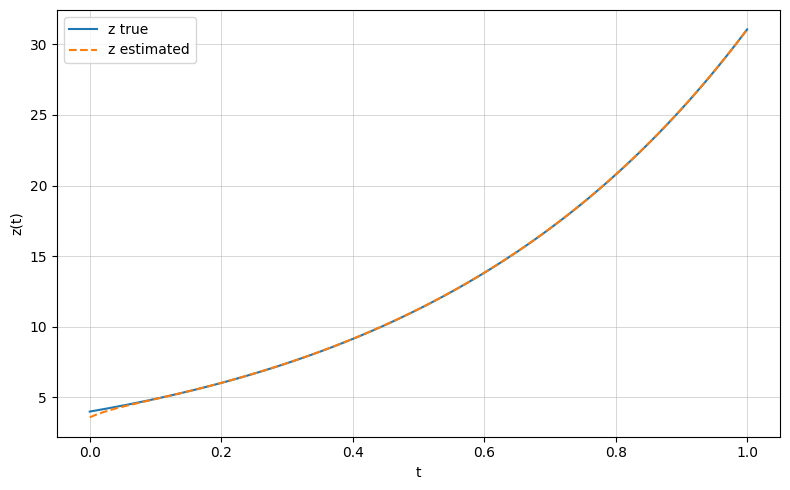

In [21]:
# Simulation for q1_opt and q2_opt (step 1 to 4)
h_true, z_true, y_m, z0_est, z_est, h_est = simulate_n1(A, G2, C, z0, h, T, N, q1_opt, q2_opt)

# Step 5: metrics
z0_error, z0_energy, z_rmse, h_rmse, misfit, henergy = compute_metrics(C, z0, h_true, z_true, y_m, z0_est, z_est, h_est, t)
print(f"===== Results with q1*={q1_opt} and q2*={q2_opt} =====")
print(f"z0 true = {z0}, z0 estimated = {z0_est}, error = {z0_error}")
print(f"RMSE_z    = {z_rmse}")
print(f"RMSE_h    = {h_rmse}")
print(f"YMisfit   = {misfit}")
print(f"z0HEnergy = {z0_energy**2 + henergy}")
print(f"z0Energy  = {z0_energy}")
print(f"HEnergy   = {henergy}")

# Step 5: quick plots
make_plots(h_true, z_true, z_est, h_est, t, q1_opt, q2_opt, save=False, outdir = "figs")